# Import

In [148]:
import numpy as np 
import math 
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits import mplot3d
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

# Particules in a sphere centered on the box 

The particules have 3 coordinates in the sphere :
Angles Phi and Teta and radius Rad

### Number of particules 

In [149]:
n = 2000

### Uniform distribution

#### Sample 

In [150]:
data_unif = np.random.uniform(0,1,(n,3))

In [151]:
def data_to_angular(data):
    rad = np.sqrt((data[:,0]-0.5)**2+(data[:,1]-0.5)**2+(data[:,2]-0.5)**2)
    teta = np.arccos((data[:,0])/(np.sqrt((data[:,0])**2 + (data[:,1])**2)))
    phi = np.arccos((data[:,0])/np.sqrt((data[:,0])**2 + (data[:,2])**2)) 
    return(np.stack((rad, phi, teta), axis=-1))

#### Transform data to angular coordinates 

In [152]:
data_unif_angular = data_to_angular(data_unif)

### Normal distribution 

In a box

In [153]:
lower, upper = 0, 1
mu, sigma = 0.5, 0.2

x_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)
y_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)
z_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)

data_norm = np.stack((x_norm, y_norm, z_norm), axis=-1)

In [154]:
data_norm_angular = data_to_angular(data_norm)

### Log-normal distribution

In [155]:
sig = 0.35
s = 0.38

x_log = stats.lognorm.rvs(s, loc=0, scale=sig, size=n)
y_log = stats.lognorm.rvs(s, loc=0, scale=sig, size=n)
z_log = stats.lognorm.rvs(s, loc=0, scale=sig, size=n)

In [156]:
data_log = np.stack((x_log, y_log, z_log), axis=-1)
data_log = np.delete( data_log, np.where(data_log > 1) , axis = 0 )

In [157]:
data_log_angular = data_to_angular(data_log)

### Angular correlation

#### longueur d'arc de cercle entre 2 points

In [208]:
r = 0.5
def arc_length(point_1, point_2):
    delta_sig = np.arccos(np.cos(point_1[1]-point_2[1])*np.cos(point_1[2]-point_2[2]))
    return(delta_sig)

In [230]:
#Max arc length is Pi 
#Same as for the box but using arc length between points 

def angular_pair_correlation(data, d):
    bins = np.zeros(math.floor((np.pi)/(2*d))+1)
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            l = arc_length(data[i],data[j])
            if math.floor(l/d) == math.floor((np.pi)/(2*d)):
                print(math.floor(l/d))
            bins[math.floor(l/d)] += 1
    #we need to normalize  divide each bins by the perimeter of the circle of radius r
    #p = np.linspace(d, np.pi/2, math.floor((np.pi*r)/(d))+1)
    return(bins)

In [231]:
res_2000 = angular_pair_correlation(data_unif_angular, 0.01)

157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157
157


In [232]:
res_norm_2000 = angular_pair_correlation(data_norm_angular, 0.01)

In [235]:
res_norm_2000[:len(res_2000)-1]/res_2000[:len(res_2000)-1]

array([1.86061947, 1.94057858, 1.87674419, 2.07764877, 2.17342409,
       2.14089595, 2.21928721, 2.34764114, 2.18209977, 2.30547945,
       2.3073459 , 2.2254582 , 2.27975976, 2.29008403, 2.31204458,
       2.34245302, 2.33065465, 2.32251388, 2.28527718, 2.30415661,
       2.27506234, 2.27931118, 2.19866329, 2.24027408, 2.24509586,
       2.18802619, 2.13915292, 2.12105689, 2.11421303, 2.01165994,
       2.03540048, 2.00119227, 1.95898473, 1.95455099, 1.93848278,
       1.87025001, 1.81935001, 1.80458397, 1.76282956, 1.75799604,
       1.6719961 , 1.65890038, 1.64178861, 1.61795305, 1.56744533,
       1.5346561 , 1.49881672, 1.45654101, 1.42336788, 1.39429198,
       1.35085366, 1.3243871 , 1.30219105, 1.28430516, 1.21760747,
       1.20783818, 1.16619462, 1.12619108, 1.10492854, 1.07815672,
       1.06007585, 1.01765177, 0.99853313, 0.9587966 , 0.96043239,
       0.91598535, 0.89429005, 0.87379286, 0.86223655, 0.82054321,
       0.79751432, 0.76999588, 0.75664963, 0.72648822, 0.70579

In [70]:
len(data_unif_angular)

10000

In [134]:
len(res_20)/2

79.0

In [142]:
 res_norm_20[6:79]/res_20[6:79]

array([2.01300589, 2.02200887, 2.01195025, 1.99596521, 1.96676552,
       1.92065928, 1.87583056, 1.82011082, 1.76175389, 1.70317008,
       1.64243856, 1.58092739, 1.5199798 , 1.45560769, 1.39225957,
       1.3270618 , 1.2649578 , 1.20152386, 1.14273114, 1.0829679 ,
       1.02993544, 0.97516264, 0.92457201, 0.87304422, 0.8236242 ,
       0.77480226, 0.7289214 , 0.68797747, 0.64676628, 0.60981873,
       0.5739893 , 0.54145057, 0.51082074, 0.48590821, 0.45951796,
       0.4344631 , 0.40752948, 0.38334817, 0.35844457, 0.3375457 ,
       0.31423395, 0.29310619, 0.27244176, 0.25262108, 0.2333015 ,
       0.21626825, 0.19864829, 0.18360323, 0.16764833, 0.15217336,
       0.13718739, 0.12372073, 0.11131599, 0.10083169, 0.09028343,
       0.08171666, 0.07343588, 0.06528218, 0.05820796, 0.05131272,
       0.04441789, 0.03891243, 0.03305431, 0.02884791, 0.02520118,
       0.02060198, 0.01825422, 0.01490823, 0.01189741, 0.00886237,
       0.00726305, 0.00581745, 0.00581395])

In [ ]:
# save the data : 

In [ ]:
res_norm # data norm 10 000

In [240]:
abs_corr_2 = np.linspace(0,np.pi,math.floor(len(res_norm_2000)-1))
len(abs_corr_2)

157

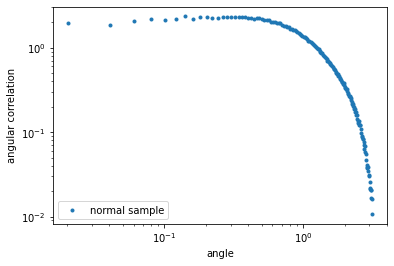

In [241]:
plt.loglog(abs_corr_2, res_norm_2000[:len(res_2000)-1]/res_2000[:len(res_2000)-1], '.', label = 'normal sample')
plt.xlabel('angle')
plt.ylabel('angular correlation')
plt.legend()
plt.show()

In [96]:
plt.plot(abs_corr, (res/p)[:130], '.', label = 'normal sample')
plt.xlabel('radius')
plt.ylabel('angular correlation')
plt.legend()
plt.savefig('angular_corr_unif_10000')

NameError: name 'p' is not defined

In [38]:
p = (np.arange(math.floor((np.pi*r)/(2*0.01))+1)+1)*0.01*2*np.pi
res_unif = np.divide(res,p)

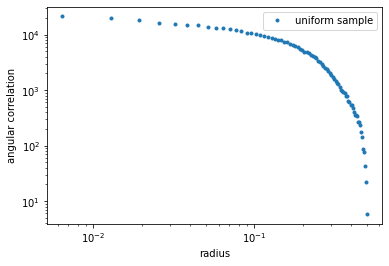

In [93]:
plt.loglog(abs_corr, res_unif, '.', label = 'uniform sample')
plt.xlabel("radius")
plt.ylabel('angular correlation')
plt.legend()
plt.savefig("angular_corr_log_scale_unif_10000")

In [144]:
data_unif_30000 = np.random.uniform(0,1,(30000,3))

In [145]:
data_unif_angular_30000 = data_to_angular(data_unif_30000)

In [146]:
res_30000 = angular_pair_correlation(data_unif_angular_30000, 0.5, 0.01)

KeyboardInterrupt: 

In [ ]:
n = 30000
lower, upper = 0, 1
mu, sigma = 0.5, 0.2

x_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)
y_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)
z_norm = stats.truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=n)

data_norm = np.stack((x_norm, y_norm, z_norm), axis=-1)

In [121]:
data_norm_angular = data_to_angular(data_norm)

In [178]:
res_30000_norm = angular_pair_correlation(data_norm_angular, 0.5, 0.01)

In [ ]:
p = (np.arange(math.floor((np.pi*r)/(2*0.01))+1)+1)*0.01*2*np.pi
unif_30000 = np.divide(res_30000,p)

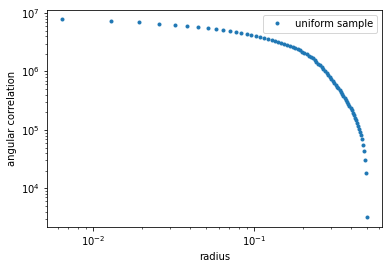

In [111]:
plt.loglog(abs_corr, unif_30000, '.', label = 'uniform sample')
plt.xlabel("radius")
plt.ylabel('angular correlation')
plt.legend()
plt.savefig("angular_corr_log_scale_unif_30000")

In [179]:
norm_30000 = (res_30000_norm/res_30000) - 1

NameError: name 'res_30000' is not defined

In [148]:
plt.loglog(abs_corr, norm_10000, '.', label = 'normal sample')
plt.xlabel("radius")
plt.ylabel('angular correlation')
plt.legend()
plt.savefig("angular_corr_log_scale_norm_30000")

NameError: name 'norm_10000' is not defined